In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
GP = pd.read_csv('GP - Final Results.csv')
Hyperband = pd.read_csv('Hyperband - Final Results.csv')
RS = pd.read_csv('RS - Final Results.csv')
TPE = pd.read_csv('TPE - Final Results.csv')

In [ ]:
GP

,Mean,Std
0,656180.594232,918933.474621
1,498.254363,192.535514
2,238.318028,221.667403
3,227.392790,205.643859
4,227.392790,205.643859
...,...,...
95,59.819517,4.536165
96,59.819517,4.536165
97,59.819517,4.536165
98,59.819517,4.536165


In [ ]:
columns = ['Epoch', 'Technique', 'MSE', 'STD']
df_rows = []
for row in range(len(GP)):
    GP_row = GP.iloc[row, :]
    Hyperband_row = Hyperband.iloc[row, :]
    RS_row = RS.iloc[row, :]
    TPE_row = TPE.iloc[row, :]

    GP_tuple = (row+1, 'Gaussian Process', GP_row.Mean, GP_row.Std)
    Hyperband_tuple = (row+1, 'Hyperband', Hyperband_row.Mean, Hyperband_row.Std)
    RS_tuple = (row+1, 'Random Search', RS_row.Mean, RS_row.Std)
    TPE_tuple = (row+1, 'Tree-structured Parzen Estimator', TPE_row.Mean, TPE_row.Std)

    df_rows.append(GP_tuple)
    df_rows.append(Hyperband_tuple)
    df_rows.append(RS_tuple)
    df_rows.append(TPE_tuple)

In [ ]:
df = pd.DataFrame(df_rows, columns=columns)
df.head()

,Epoch,Technique,MSE,STD
0,1,Gaussian Process,6.561806e+05,9.189335e+05
1,1,Hyperband,1.554012e+06,3.106083e+06
2,1,Random Search,1.111223e+02,5.297983e+01
3,1,Tree-structured Parzen Estimator,8.595371e+01,5.182742e+00
4,2,Gaussian Process,4.982544e+02,1.925355e+02


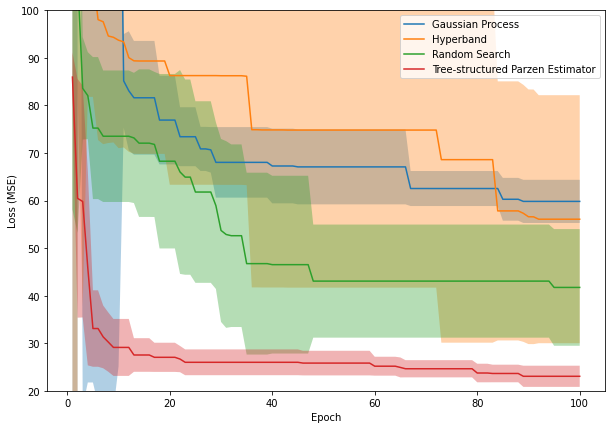

In [ ]:
plt, ax = plt.subplots(figsize=(10,7))
ax.set_ylim(20, 100)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
for i, m in df.groupby("Technique"):
    ax.plot(m.Epoch, m.MSE, label=str(m.Technique.to_numpy()[0]))
    ax.fill_between(m.Epoch, m.MSE - m.STD, m.MSE + m.STD, alpha=0.35)
ax.legend()
plt.savefig('graph.svg')

In [ ]:
df.groupby("Technique")